In [1]:
from graph_utils import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson
from IPython.display import clear_output

# Характеристики графа относительного соседства (vector length 6)

In [2]:
rng_ru = np.load("/Users/yuvlo/Spot-the-bot/Graph/GraphCheck/6_rng_ru.npy", allow_pickle=True).take(0)

rng_ru_6 = nx.Graph()
my_rng_ru_6 = GG(rng_ru)

edges = my_rng_ru_6.get_weighted_edges()
rng_ru_6.add_weighted_edges_from(edges)

100%|████████████████████████████████| 211648/211648 [00:02<00:00, 90836.08it/s]


## Распределение степеней

In [3]:
def plot_graph_degrees(degrees: list, k: int, x_max: int, y_max: int = 20000, size: tuple = (10, 8)):
    degrees = np.array(degrees)
    y = []
    xs = [x for x in range(x_max)]
    for x in xs:
        y.append(len(degrees[degrees == x]))
    plt.figure(figsize=size)
    plt.bar(x=xs, height=y)
    plt.xticks(xs, rotation=45)
    plt.grid()
    plt.title(f"Распределение степеней графа относительного соседства при размере вектора {k}")
    plt.ylabel("Кол-во вершин")
    plt.xlabel("Кол-во соседей")
    plt.ylim(0, y_max)
    plt.show()
    return y

In [4]:
graph_degrees = my_rng_ru_6.get_graph_degrees()

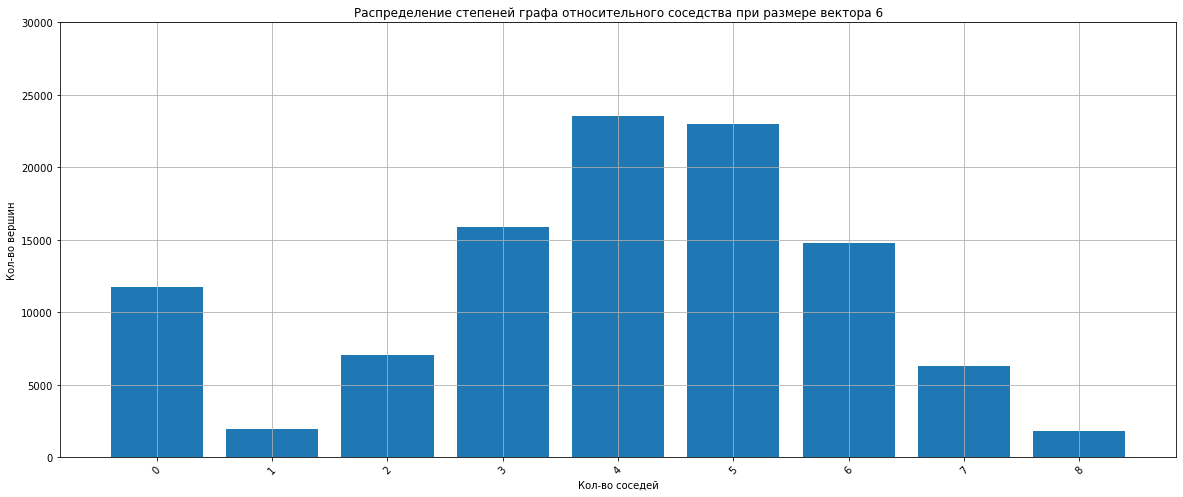

In [5]:
y = plot_graph_degrees(graph_degrees, k=6, x_max=9, y_max=30000, size=(20, 8))

In [9]:
y[0]

11773

In [6]:
y[1:]

[1952, 7047, 15862, 23510, 22963, 14781, 6259, 1818]

In [10]:
sum(y[1:])

94192

In [7]:
stat, p = normaltest(y[1:])

/Users/yuvlo/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
p

0.39743057344838156

In [16]:
shapiro(y[1:])

ShapiroResult(statistic=0.8921946287155151, pvalue=0.24525682628154755)

In [17]:
nx.is_connected(rng_ru_6)

False

In [19]:
components_len = list(map(lambda component: len(component), list(nx.connected_components(rng_ru_6))))

In [45]:
rng_c = rng_ru_6.subgraph(list(nx.connected_components(rng_ru_6))[0])

In [46]:
d = nx.single_source_dijkstra_path_length(rng_c, 'это')

In [50]:
min(d, key=d.get)

'это'

In [88]:
"""
Compute the shortest paths and path lengths between nodes in the graph.

These algorithms work with undirected and directed graphs.

"""

import networkx as nx

def has_path(G, source, target):
    """Returns *True* if *G* has a path from *source* to *target*.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node for path

    target : node
       Ending node for path
    """
    try:
        nx.shortest_path(G, source, target)
    except nx.NetworkXNoPath:
        return False
    return True



def shortest_path(G, source=None, target=None, weight=None, method="dijkstra"):
    """Compute shortest paths in the graph.

    Parameters
    ----------
    G : NetworkX graph

    source : node, optional
        Starting node for path. If not specified, compute shortest
        paths for each possible starting node.

    target : node, optional
        Ending node for path. If not specified, compute shortest
        paths to all possible nodes.

    weight : None, string or function, optional (default = None)
        If None, every edge has weight/distance/cost 1.
        If a string, use this edge attribute as the edge weight.
        Any edge attribute not present defaults to 1.
        If this is a function, the weight of an edge is the value
        returned by the function. The function must accept exactly
        three positional arguments: the two endpoints of an edge and
        the dictionary of edge attributes for that edge.
        The function must return a number.

    method : string, optional (default = 'dijkstra')
        The algorithm to use to compute the path.
        Supported options: 'dijkstra', 'bellman-ford'.
        Other inputs produce a ValueError.
        If `weight` is None, unweighted graph methods are used, and this
        suggestion is ignored.

    Returns
    -------
    path: list or dictionary
        All returned paths include both the source and target in the path.

        If the source and target are both specified, return a single list
        of nodes in a shortest path from the source to the target.

        If only the source is specified, return a dictionary keyed by
        targets with a list of nodes in a shortest path from the source
        to one of the targets.

        If only the target is specified, return a dictionary keyed by
        sources with a list of nodes in a shortest path from one of the
        sources to the target.

        If neither the source nor target are specified return a dictionary
        of dictionaries with path[source][target]=[list of nodes in path].

    Raises
    ------
    NodeNotFound
        If `source` is not in `G`.

    ValueError
        If `method` is not among the supported options.

    Examples
    --------
    >>> G = nx.path_graph(5)
    >>> print(nx.shortest_path(G, source=0, target=4))
    [0, 1, 2, 3, 4]
    >>> p = nx.shortest_path(G, source=0)  # target not specified
    >>> p[3] # shortest path from source=0 to target=3
    [0, 1, 2, 3]
    >>> p = nx.shortest_path(G, target=4)  # source not specified
    >>> p[1] # shortest path from source=1 to target=4
    [1, 2, 3, 4]
    >>> p = nx.shortest_path(G)  # source, target not specified
    >>> p[2][4] # shortest path from source=2 to target=4
    [2, 3, 4]

    Notes
    -----
    There may be more than one shortest path between a source and target.
    This returns only one of them.

    See Also
    --------
    all_pairs_shortest_path
    all_pairs_dijkstra_path
    all_pairs_bellman_ford_path
    single_source_shortest_path
    single_source_dijkstra_path
    single_source_bellman_ford_path
    """
    if method not in ("dijkstra", "bellman-ford"):
        # so we don't need to check in each branch later
        raise ValueError(f"method not supported: {method}")
    method = "unweighted" if weight is None else method
    if source is None:
        if target is None:
            # Find paths between all pairs.
            if method == "unweighted":
                paths = dict(nx.all_pairs_shortest_path(G))
            elif method == "dijkstra":
                paths = dict(nx.all_pairs_dijkstra_path(G, weight=weight))
            else:  # method == 'bellman-ford':
                paths = dict(nx.all_pairs_bellman_ford_path(G, weight=weight))
        else:
            # Find paths from all nodes co-accessible to the target.
            if G.is_directed():
                G = G.reverse(copy=False)
            if method == "unweighted":
                paths = nx.single_source_shortest_path(G, target)
            elif method == "dijkstra":
                paths = nx.single_source_dijkstra_path(G, target, weight=weight)
            else:  # method == 'bellman-ford':
                paths = nx.single_source_bellman_ford_path(G, target, weight=weight)
            # Now flip the paths so they go from a source to the target.
            for target in paths:
                paths[target] = list(reversed(paths[target]))
    else:
        if target is None:
            # Find paths to all nodes accessible from the source.
            if method == "unweighted":
                paths = nx.single_source_shortest_path(G, source)
            elif method == "dijkstra":
                paths = nx.single_source_dijkstra_path(G, source, weight=weight)
            else:  # method == 'bellman-ford':
                paths = nx.single_source_bellman_ford_path(G, source, weight=weight)
        else:
            # Find shortest source-target path.
            if method == "unweighted":
                paths = nx.bidirectional_shortest_path(G, source, target)
            elif method == "dijkstra":
                _, paths = nx.bidirectional_dijkstra(G, source, target, weight)
            else:  # method == 'bellman-ford':
                paths = nx.bellman_ford_path(G, source, target, weight)
    return paths



def shortest_path_length(G, source=None, target=None, weight=None, method="dijkstra"):
    """Compute shortest path lengths in the graph.

    Parameters
    ----------
    G : NetworkX graph

    source : node, optional
        Starting node for path.
        If not specified, compute shortest path lengths using all nodes as
        source nodes.

    target : node, optional
        Ending node for path.
        If not specified, compute shortest path lengths using all nodes as
        target nodes.

    weight : None, string or function, optional (default = None)
        If None, every edge has weight/distance/cost 1.
        If a string, use this edge attribute as the edge weight.
        Any edge attribute not present defaults to 1.
        If this is a function, the weight of an edge is the value
        returned by the function. The function must accept exactly
        three positional arguments: the two endpoints of an edge and
        the dictionary of edge attributes for that edge.
        The function must return a number.

    method : string, optional (default = 'dijkstra')
        The algorithm to use to compute the path length.
        Supported options: 'dijkstra', 'bellman-ford'.
        Other inputs produce a ValueError.
        If `weight` is None, unweighted graph methods are used, and this
        suggestion is ignored.

    Returns
    -------
    length: int or iterator
        If the source and target are both specified, return the length of
        the shortest path from the source to the target.

        If only the source is specified, return a dict keyed by target
        to the shortest path length from the source to that target.

        If only the target is specified, return a dict keyed by source
        to the shortest path length from that source to the target.

        If neither the source nor target are specified, return an iterator
        over (source, dictionary) where dictionary is keyed by target to
        shortest path length from source to that target.

    Raises
    ------
    NodeNotFound
        If `source` is not in `G`.

    NetworkXNoPath
        If no path exists between source and target.

    ValueError
        If `method` is not among the supported options.

    Examples
    --------
    >>> G = nx.path_graph(5)
    >>> nx.shortest_path_length(G, source=0, target=4)
    4
    >>> p = nx.shortest_path_length(G, source=0)  # target not specified
    >>> p[4]
    4
    >>> p = nx.shortest_path_length(G, target=4)  # source not specified
    >>> p[0]
    4
    >>> p = dict(nx.shortest_path_length(G))  # source,target not specified
    >>> p[0][4]
    4

    Notes
    -----
    The length of the path is always 1 less than the number of nodes involved
    in the path since the length measures the number of edges followed.

    For digraphs this returns the shortest directed path length. To find path
    lengths in the reverse direction use G.reverse(copy=False) first to flip
    the edge orientation.

    See Also
    --------
    all_pairs_shortest_path_length
    all_pairs_dijkstra_path_length
    all_pairs_bellman_ford_path_length
    single_source_shortest_path_length
    single_source_dijkstra_path_length
    single_source_bellman_ford_path_length
    """
    if method not in ("dijkstra", "bellman-ford"):
        # so we don't need to check in each branch later
        raise ValueError(f"method not supported: {method}")
    method = "unweighted" if weight is None else method
    if source is None:
        if target is None:
            # Find paths between all pairs.
            if method == "unweighted":
                paths = nx.all_pairs_shortest_path_length(G)
            elif method == "dijkstra":
                paths = nx.all_pairs_dijkstra_path_length(G, weight=weight)
            else:  # method == 'bellman-ford':
                paths = nx.all_pairs_bellman_ford_path_length(G, weight=weight)
        else:
            # Find paths from all nodes co-accessible to the target.
            if G.is_directed():
                G = G.reverse(copy=False)
            if method == "unweighted":
                path_length = nx.single_source_shortest_path_length
                paths = path_length(G, target)
            elif method == "dijkstra":
                path_length = nx.single_source_dijkstra_path_length
                paths = path_length(G, target, weight=weight)
            else:  # method == 'bellman-ford':
                path_length = nx.single_source_bellman_ford_path_length
                paths = path_length(G, target, weight=weight)
    else:
        if target is None:
            # Find paths to all nodes accessible from the source.
            if method == "unweighted":
                paths = nx.single_source_shortest_path_length(G, source)
            elif method == "dijkstra":
                path_length = nx.single_source_dijkstra_path_length
                paths = path_length(G, source, weight=weight)
            else:  # method == 'bellman-ford':
                path_length = nx.single_source_bellman_ford_path_length
                paths = path_length(G, source, weight=weight)
        else:
            # Find shortest source-target path.
            if method == "unweighted":
                p = nx.bidirectional_shortest_path(G, source, target)
                paths = len(p) - 1
            elif method == "dijkstra":
                paths = nx.dijkstra_path_length(G, source, target, weight)
            else:  # method == 'bellman-ford':
                paths = nx.bellman_ford_path_length(G, source, target, weight)
    return paths



def average_shortest_path_length(G, weight=None, method=None):
    r"""Returns the average shortest path length.

    The average shortest path length is

    .. math::

       a =\sum_{s,t \in V} \frac{d(s, t)}{n(n-1)}

    where `V` is the set of nodes in `G`,
    `d(s, t)` is the shortest path from `s` to `t`,
    and `n` is the number of nodes in `G`.

    Parameters
    ----------
    G : NetworkX graph

    weight : None, string or function, optional (default = None)
        If None, every edge has weight/distance/cost 1.
        If a string, use this edge attribute as the edge weight.
        Any edge attribute not present defaults to 1.
        If this is a function, the weight of an edge is the value
        returned by the function. The function must accept exactly
        three positional arguments: the two endpoints of an edge and
        the dictionary of edge attributes for that edge.
        The function must return a number.

    method : string, optional (default = 'unweighted' or 'djikstra')
        The algorithm to use to compute the path lengths.
        Supported options are 'unweighted', 'dijkstra', 'bellman-ford',
        'floyd-warshall' and 'floyd-warshall-numpy'.
        Other method values produce a ValueError.
        The default method is 'unweighted' if `weight` is None,
        otherwise the default method is 'dijkstra'.

    Raises
    ------
    NetworkXPointlessConcept
        If `G` is the null graph (that is, the graph on zero nodes).

    NetworkXError
        If `G` is not connected (or not weakly connected, in the case
        of a directed graph).

    ValueError
        If `method` is not among the supported options.

    Examples
    --------
    >>> G = nx.path_graph(5)
    >>> nx.average_shortest_path_length(G)
    2.0

    For disconnected graphs, you can compute the average shortest path
    length for each component

    >>> G = nx.Graph([(1, 2), (3, 4)])
    >>> for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    ...     print(nx.average_shortest_path_length(C))
    1.0
    1.0

    """
    single_source_methods = ["unweighted", "dijkstra", "bellman-ford"]
    all_pairs_methods = ["floyd-warshall", "floyd-warshall-numpy"]
    supported_methods = single_source_methods + all_pairs_methods

    if method is None:
        method = "unweighted" if weight is None else "dijkstra"
    if method not in supported_methods:
        raise ValueError(f"method not supported: {method}")

    n = len(G)
    # For the special case of the null graph, raise an exception, since
    # there are no paths in the null graph.
    if n == 0:
        msg = (
            "the null graph has no paths, thus there is no average"
            "shortest path length"
        )
        raise nx.NetworkXPointlessConcept(msg)
    # For the special case of the trivial graph, return zero immediately.
    if n == 1:
        return 0
    # Shortest path length is undefined if the graph is disconnected.
    if G.is_directed() and not nx.is_weakly_connected(G):
        raise nx.NetworkXError("Graph is not weakly connected.")
    if not G.is_directed() and not nx.is_connected(G):
        raise nx.NetworkXError("Graph is not connected.")

    # Compute all-pairs shortest paths.
    def path_length(v):
        if method == "unweighted":
            return nx.single_source_shortest_path_length(G, v)
        elif method == "dijkstra":
            return nx.single_source_dijkstra_path_length(G, v, weight=weight)
        elif method == "bellman-ford":
            return nx.single_source_bellman_ford_path_length(G, v, weight=weight)

    if method in single_source_methods:
        # Sum the distances for each (ordered) pair of source and target node.
        s = 0
        s_pp = 0
        cnt = 0
        spp_l = []
        for u in G:
            s_p = s
            for l in path_length(u).values():
                s += l
            cnt += 1
            s_pp += (s - s_p) / (n * (n - 1))
            print(s / (n * (n - 1)), s_pp / cnt, cnt)
            spp_l.append(s_pp / cnt)
            plt.plot([x for x in range(len(spp_l))], spp_l)
            plt.ylim(0)
            plt.show()
            clear_output(wait=True)
    else:
        if method == "floyd-warshall":
            all_pairs = nx.floyd_warshall(G, weight=weight)
            s = sum(sum(t.values()) for t in all_pairs.values())
        elif method == "floyd-warshall-numpy":
            s = nx.floyd_warshall_numpy(G, weight=weight).sum()
    return s / (n * (n - 1))



def all_shortest_paths(G, source, target, weight=None, method="dijkstra"):
    """Compute all shortest simple paths in the graph.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node for path.

    target : node
       Ending node for path.

    weight : None, string or function, optional (default = None)
        If None, every edge has weight/distance/cost 1.
        If a string, use this edge attribute as the edge weight.
        Any edge attribute not present defaults to 1.
        If this is a function, the weight of an edge is the value
        returned by the function. The function must accept exactly
        three positional arguments: the two endpoints of an edge and
        the dictionary of edge attributes for that edge.
        The function must return a number.

    method : string, optional (default = 'dijkstra')
       The algorithm to use to compute the path lengths.
       Supported options: 'dijkstra', 'bellman-ford'.
       Other inputs produce a ValueError.
       If `weight` is None, unweighted graph methods are used, and this
       suggestion is ignored.

    Returns
    -------
    paths : generator of lists
        A generator of all paths between source and target.

    Raises
    ------
    ValueError
        If `method` is not among the supported options.

    NetworkXNoPath
        If `target` cannot be reached from `source`.

    Examples
    --------
    >>> G = nx.Graph()
    >>> nx.add_path(G, [0, 1, 2])
    >>> nx.add_path(G, [0, 10, 2])
    >>> print([p for p in nx.all_shortest_paths(G, source=0, target=2)])
    [[0, 1, 2], [0, 10, 2]]

    Notes
    -----
    There may be many shortest paths between the source and target.  If G
    contains zero-weight cycles, this function will not produce all shortest
    paths because doing so would produce infinitely many paths of unbounded
    length -- instead, we only produce the shortest simple paths.

    See Also
    --------
    shortest_path
    single_source_shortest_path
    all_pairs_shortest_path
    """
    method = "unweighted" if weight is None else method
    if method == "unweighted":
        pred = nx.predecessor(G, source)
    elif method == "dijkstra":
        pred, dist = nx.dijkstra_predecessor_and_distance(G, source, weight=weight)
    elif method == "bellman-ford":
        pred, dist = nx.bellman_ford_predecessor_and_distance(G, source, weight=weight)
    else:
        raise ValueError(f"method not supported: {method}")

    return _build_paths_from_predecessors({source}, target, pred)



def _build_paths_from_predecessors(sources, target, pred):
    """Compute all simple paths to target, given the predecessors found in
    pred, terminating when any source in sources is found.

    Parameters
    ----------
    sources : set
       Starting nodes for path.

    target : node
       Ending node for path.

    pred : dict
       A dictionary of predecessor lists, keyed by node

    Returns
    -------
    paths : generator of lists
        A generator of all paths between source and target.

    Raises
    ------
    NetworkXNoPath
        If `target` cannot be reached from `source`.

    Notes
    -----
    There may be many paths between the sources and target.  If there are
    cycles among the predecessors, this function will not produce all
    possible paths because doing so would produce infinitely many paths
    of unbounded length -- instead, we only produce simple paths.

    See Also
    --------
    shortest_path
    single_source_shortest_path
    all_pairs_shortest_path
    all_shortest_paths
    bellman_ford_path
    """
    if target not in pred:
        raise nx.NetworkXNoPath(
            f"Target {target} cannot be reached" f"from given sources"
        )

    seen = {target}
    stack = [[target, 0]]
    top = 0
    while top >= 0:
        node, i = stack[top]
        if node in sources:
            yield [p for p, n in reversed(stack[: top + 1])]
        if len(pred[node]) > i:
            stack[top][1] = i + 1
            next = pred[node][i]
            if next in seen:
                continue
            else:
                seen.add(next)
            top += 1
            if top == len(stack):
                stack.append([next, 0])
            else:
                stack[top][:] = [next, 0]
        else:
            seen.discard(node)
            top -= 1

In [90]:
average_shortest_path_length(rng_c, weight='weight')

KeyboardInterrupt: 

In [86]:
spp_l

NameError: name 'spp_l' is not defined

In [87]:
d['маг']

34.6050902863883

## Диаметр графа

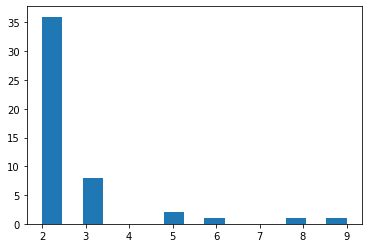

In [33]:
components_len_counts = plt.hist(components_len[1:], bins=15)

Невозможно посчитать, так как граф несвязный

## Радиус графа

Невозможно посчитать, так как граф несвязный

## Средняя длина кратчайшего пути (average shortest path length)

Невозможно посчитать, так как граф несвязный

## Распределение центральности по близости (closeness centrality)

In [91]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/rng_closeness_centrality.pickle", 'rb') as f:
    rng_cc = pickle.load(f)

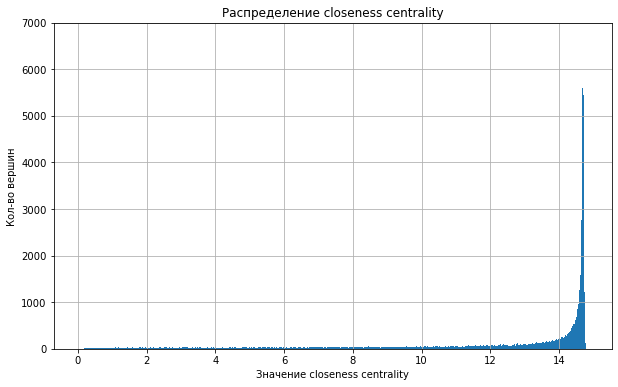

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(rng_cc.values(), bins=1000)
plt.ylim(0, 7000)
plt.grid()
plt.title("Распределение closeness centrality")
plt.xlabel("Значение closeness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

## Средняя степень соседей (Average Neighbor Degree)

In [102]:
av_nd = nx.average_neighbor_degree(rng_ru_6)
av_nd_w = nx.average_neighbor_degree(rng_ru_6, weight='weight')

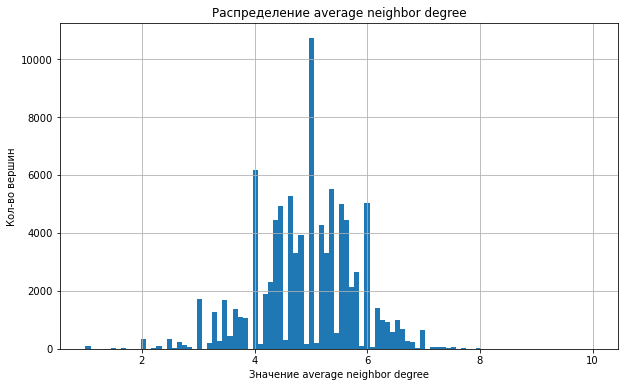

In [105]:
plt.figure(figsize=(10, 6))
plt.hist(av_nd.values(), bins=100)
# plt.ylim(0, 400)
plt.grid()
plt.title("Распределение average neighbor degree")
plt.xlabel("Значение average neighbor degree")
plt.ylabel("Кол-во вершин")
plt.show()

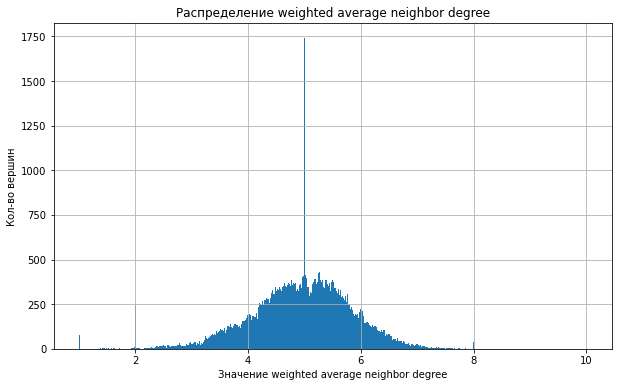

In [108]:
plt.figure(figsize=(10, 6))
plt.hist(av_nd_w.values(), bins=1000)
# plt.ylim(0, 400)
plt.grid()
plt.title("Распределение weighted average neighbor degree")
plt.xlabel("Значение weighted average neighbor degree")
plt.ylabel("Кол-во вершин")
plt.show()

Из этого определения следует, что $k_{nn,i}^w> k_{nn,i}$, если ребра с большими весами указывают на соседей с большей степенью. И $k_{nn,i}^w < k_{nn,i}$ для противоположного

In [109]:
more_list, less_list = [], []
for word in av_nd:
    if av_nd_w[word] > av_nd[word]:
        more_list.append(word)
    else:
        less_list.append(word)

In [110]:
len(more_list)

50493

In [111]:
len(less_list)

44111

## Центральность по близости между вершинами (vertices betweenness centrality)

In [94]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/rng_betweenness_centrality.pickle", "rb") as f:
    rng_bc = pickle.load(f)

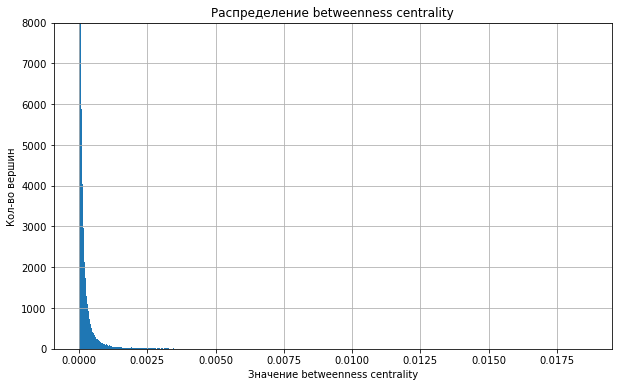

In [95]:
plt.figure(figsize=(10, 6))
plt.hist(rng_bc.values(), bins=1000)
plt.ylim(0, 8000)
plt.grid()
plt.title("Распределение betweenness centrality")
plt.xlabel("Значение betweenness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

## Центральность по близости между ребрами (edges betweenness centrality)

In [97]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/rng_edge_betweenness_centrality.pickle", "rb") as f:
    rng_ebc = pickle.load(f)

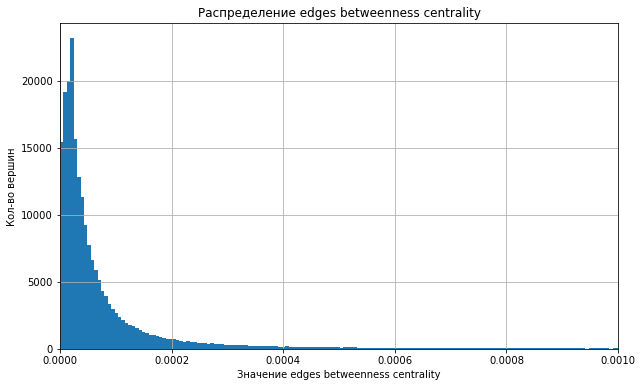

In [99]:
plt.figure(figsize=(10, 6))
plt.hist(rng_ebc.values(), bins=3000)
# plt.ylim(0, 1000)
plt.xlim(0, 0.001)
plt.grid()
plt.title("Распределение edges betweenness centrality")
plt.xlabel("Значение edges betweenness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

In [100]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/rng_load_centrality.pickle", "rb") as f:
    rng_load = pickle.load(f)

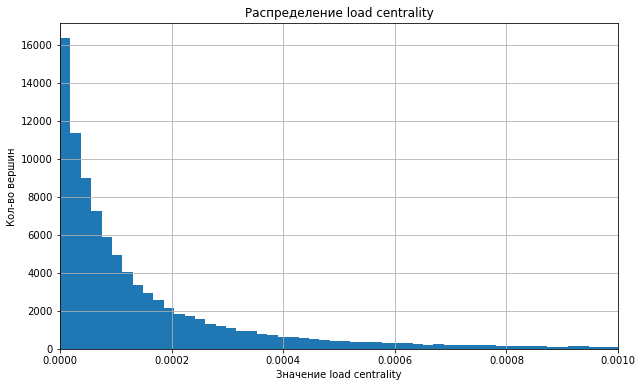

In [101]:
plt.figure(figsize=(10, 6))
plt.hist(rng_load.values(), bins=1000)
# plt.ylim(0, 1000)
plt.xlim(0, 0.001)
plt.grid()
plt.title("Распределение load centrality")
plt.xlabel("Значение load centrality")
plt.ylabel("Кол-во вершин")
plt.show()

## Коэффициент кластеризации (взвешенный и невзвешенный)

In [21]:
cc = nx.clustering(rng_ru_6)
cc_w = nx.clustering(rng_ru_6, weight='weight')

In [15]:
more_list, less_list = [], []
for word in cc:
    if cc_w[word] > cc[word]:
        more_list.append(word)
    else:
        less_list.append(word)

In [16]:
len(more_list)

0

In [17]:
len(less_list)

94604

In [31]:
my_rng_ru_6.vertices['бежать'].neighbors

{'гора', 'красный', 'снег', 'трава', 'тяжелый', 'угол'}

In [35]:
my_rng_ru_6.vertices['трава'].neighbors

{'бежать', 'край', 'крик'}

## Средний коэффициент кластеризации (взвешенный и невзвешенный)

In [112]:
cc = nx.clustering(rng_ru_6)

In [117]:
cc

{'козий': 0,
 'вороний': 0,
 'патлы': 0,
 'подтаивать': 0,
 'фотосинтез': 0,
 'варочный': 0,
 'канонада': 0,
 'амбразура': 0,
 'грыжа': 0,
 'керосинка': 0,
 'пушить': 0,
 'стариков': 0,
 'полудева': 0,
 'борин': 0,
 'покатистый': 0,
 'цимбалы': 0,
 'горски': 0,
 'обескрыливать': 0,
 'алет': 0,
 'топазный': 0,
 'раздышаться': 0,
 'подсучивать': 0,
 'вводиться': 0,
 'вымирание': 0,
 'патетичный': 0,
 'мухлеж': 0,
 'самозаряжающийся': 0,
 'аконитин': 0,
 'чара': 0,
 'господарь': 0,
 'простата': 0,
 'мочеиспускание': 0,
 'выстаиваться': 0,
 'лапотный': 0,
 'гуммель': 0,
 'соиздатель': 0,
 'поводиться': 0,
 'гликерия': 0,
 'необъемный': 0,
 'трк': 0,
 'напрыскивать': 0,
 'вдохновенность': 0,
 'ароматерапия': 0,
 'эксцентрика': 0,
 'порядковый': 0,
 'дееспособный': 0,
 'распродажный': 0,
 'авет': 0,
 'респект': 0,
 'отпускник': 0,
 'громозвучный': 0,
 'бахчисарайский': 0,
 'ресничный': 0,
 'обстрекать': 0,
 'скипидарный': 0,
 'звуковик': 0,
 'гармония': 0,
 'необычайный': 0,
 'петунья': 0,
 

In [114]:
w_cc = nx.clustering(rng_ru_6, weight='weight')

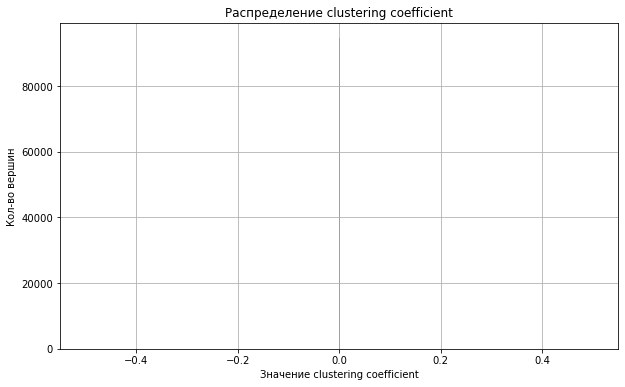

In [116]:
plt.figure(figsize=(10, 6))
plt.hist(cc.values(), bins=1000)
# plt.ylim(0, 1200)
plt.grid()
plt.title("Распределение clustering coefficient")
plt.xlabel("Значение clustering coefficient")
plt.ylabel("Кол-во вершин")
plt.show()

In [118]:
nx.average_clustering(rng_ru_6)

0.0

In [119]:
nx.average_clustering(rng_ru_6, weight='weight')

0.0

In [4]:
nds = list(rng_ru_6.nodes)[:10000]

In [5]:
nx.degree_assortativity_coefficient(rng_ru_6, weight='weight', nodes=nds)

0.8787716101534929

In [6]:
rc = nx.rich_club_coefficient(rng_ru_6, normalized=False)

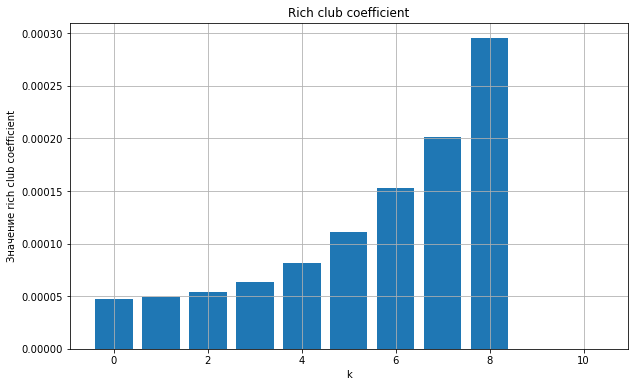

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(x=rc.keys(), height=rc.values())
plt.grid()
plt.title("Rich club coefficient")
plt.xlabel("k")
plt.ylabel("Значение rich club coefficient")
plt.show()